In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [95]:
def generate_data(nx, qtde):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []
    
    for _ in range(qtde//2):
        # Randomly generate parameters A, a, and b
        A = np.random.uniform(-2, 2)
        a = np.random.uniform(0, 2)
        b = np.random.uniform(0, 2)
        
        # Construct polynomial and its derivative for degree 3 and 4
        polinomials = [
            A * (x**2 - a**2) * x,  # Degree 3
            A * (x**2 - a**2) * (x**2 - b**2)  # Degree 4
        ]
        derivatives = [
            A * ((2 * x) * x + (x**2 - a**2)),  # Derivative for degree 3
            A * ((2 * x) * (x**2 - b**2) + (x**2 - a**2) * (2 * x))  # Derivative for degree 4
        ]
        
        # Randomly select degree 3 or 4
        r = np.random.choice([0, 1])
        y.append(polinomials[r])
        dy.append(derivatives[r])
        
        # Add noise to the polynomial and derivative
        noise_y = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        noise_dy = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        y[r]  = y[r] / np.max(np.abs(y[r])) + noise_y
        dy[r] = dy[r] / np.max(np.abs(dy[r])) + noise_dy
    
    # Stack data
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# Generate data
y, dy = generate_data(20, 1000)

print(y.shape)
print(dy.shape)

(500, 20)
(500, 20)


In [96]:
# separa os os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10
layers = 10

# define modelo
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=100000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)

# treinamento
model.fit(X_train, y_train)

# teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Iteration 1, loss = 3.29359195
Iteration 2, loss = 3.27271900
Iteration 3, loss = 3.25319410
Iteration 4, loss = 3.23617015
Iteration 5, loss = 3.22215843
Iteration 6, loss = 3.21048863
Iteration 7, loss = 3.20077254
Iteration 8, loss = 3.19217673
Iteration 9, loss = 3.18422983
Iteration 10, loss = 3.17696544
Iteration 11, loss = 3.16943923
Iteration 12, loss = 3.16181870
Iteration 13, loss = 3.15411765
Iteration 14, loss = 3.14610703
Iteration 15, loss = 3.13727697
Iteration 16, loss = 3.12807041
Iteration 17, loss = 3.11766547
Iteration 18, loss = 3.10632494
Iteration 19, loss = 3.09397333
Iteration 20, loss = 3.08060700
Iteration 21, loss = 3.06720582
Iteration 22, loss = 3.05153378
Iteration 23, loss = 3.03484335
Iteration 24, loss = 3.01891477
Iteration 25, loss = 3.00115621
Iteration 26, loss = 2.98230663
Iteration 27, loss = 2.96349141
Iteration 28, loss = 2.94361197
Iteration 29, loss = 2.92324584
Iteration 30, loss = 2.90294919
Iteration 31, loss = 2.88213081
Iteration 32, los

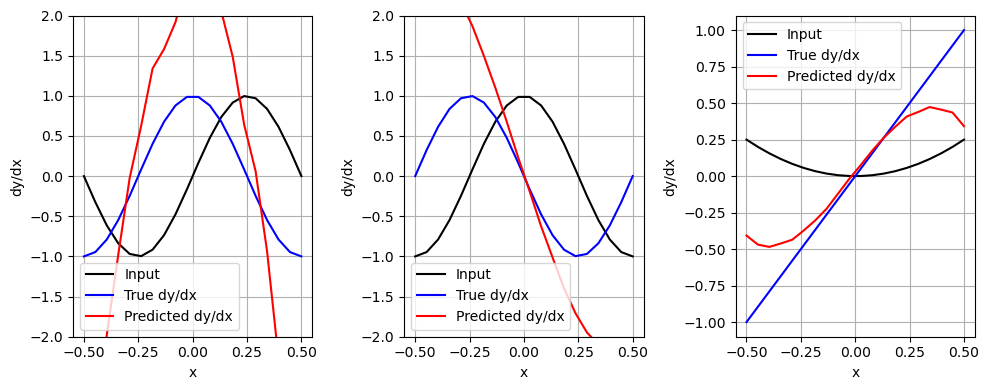

In [97]:
plt.figure(figsize=(10, 4))

new_x = np.linspace(-.5, .5, y.shape[1]).reshape(1,-1)

# test 1
plt.subplot(131)
new_y = np.sin(2*np.pi*new_x)
new_dy = np.cos(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 2
plt.subplot(132)
new_y = np.cos(2*np.pi*new_x)
new_dy = -np.sin(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 3
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()